In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from pydataset import data

In [2]:
# Use the iris database to answer the following quesitons:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.petal_length.describe()

count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64

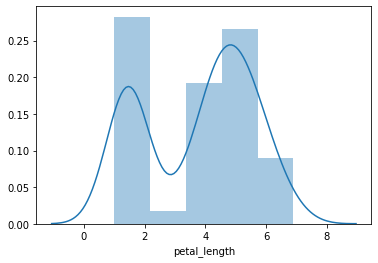

In [4]:
# What does the distribution of petal lengths look like?

sns.distplot(iris.petal_length)

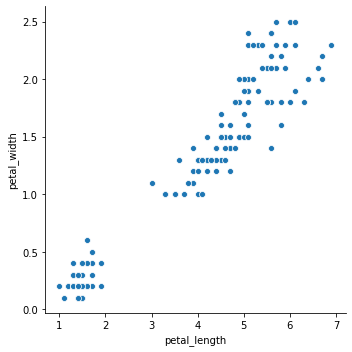

In [5]:
# Is there a correlation between petal length and petal width?

sns.relplot(x='petal_length', y='petal_width', data=iris)

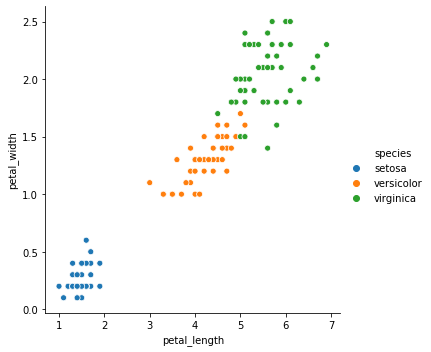

In [6]:
# Would it be reasonable to predict species based on sepal width and sepal length?

sns.relplot(x='petal_length', y='petal_width', hue='species', data=iris)

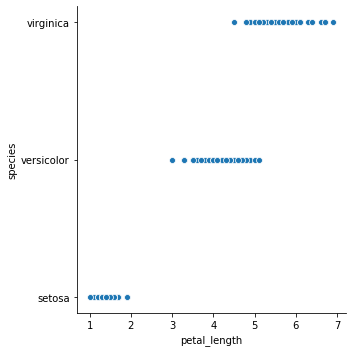

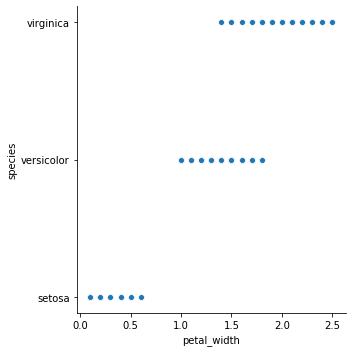

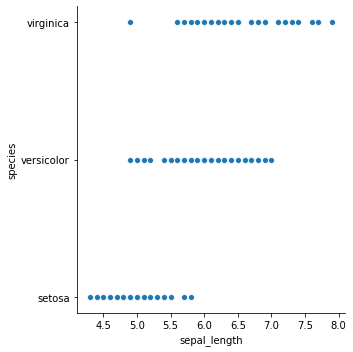

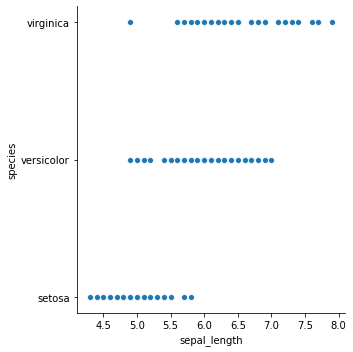

In [7]:
# Which features would be best used to predict species?

lst = ['petal_length', 'petal_width', 'sepal_length', 'sepal_length']

for feature in lst:
    
    sns.relplot(x=f'{feature}', y='species', data=iris)
    

In [8]:
# Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. 

df = sns.load_dataset('anscombe')
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [9]:
# Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. 
# What do you notice?

df = df.groupby('dataset').agg({'x':'mean','y':'mean'})
df


,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


In [10]:
spray = data('InsectSprays')
spray.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


Text(0.5, 1.0, 'Count of Sprays')

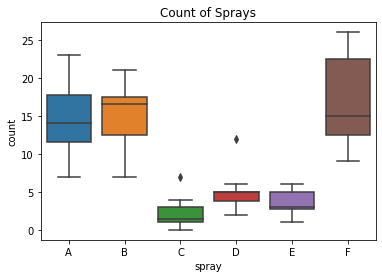

In [11]:
sns.boxplot(x='spray', y='count', data=spray)
plt.title("Count of Sprays")

In [12]:
# Load the swiss dataset and read it's documentation. 
swiss = data('swiss')
swiss.head()


# Does whether or not a province is Catholic influence fertility?
# What measure correlates most strongly with fertility?
# Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

# Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


Text(0.5, 1.0, 'Catholic')

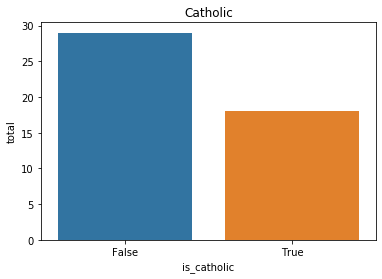

In [13]:
#Create visualizations to answer the following questions:

# Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. 
# (Choose a cutoff point for what constitutes catholic)

swiss["is_catholic"] = swiss.Catholic >= 50

swiss['total'] = 1

swiss = swiss.groupby('is_catholic')[['total']].count().reset_index()

sns.barplot(data=swiss, x='is_catholic', y='total')
plt.title("Catholic")

In [15]:
# Does whether or not a province is Catholic influence fertility?

swiss = data('swiss')

swiss["is_catholic"] = swiss.Catholic >= 50




In [18]:
swiss = swiss.groupby('is_catholic')[['Fertility']].mean().reset_index()

swiss.head()

,is_catholic,Fertility
0,False,66.220690
1,True,76.461111


Text(0.5, 1.0, 'Average Fertility in Catholic and Non-Catholic Communities')

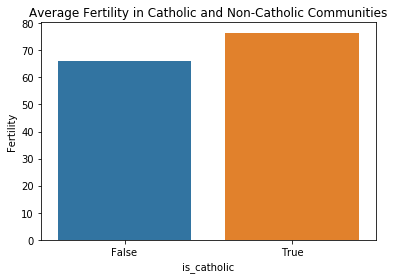

In [20]:
sns.barplot(data=swiss,x='is_catholic',y='Fertility')
plt.title("Average Fertility in Catholic and Non-Catholic Communities")

In [24]:
swiss = data('swiss')
swiss["is_catholic"] = swiss.Catholic >= 50
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


Text(0.5, 1.0, 'Fertility in Catholic and Non-Catholic Communities')

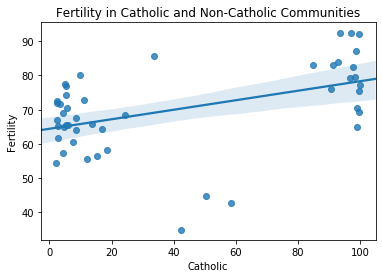

In [28]:
sns.regplot(x='Catholic', y='Fertility', data=swiss)
plt.title("Fertility in Catholic and Non-Catholic Communities")